In [2]:
import pandas as pd
import matplotlib.pyplot as plt

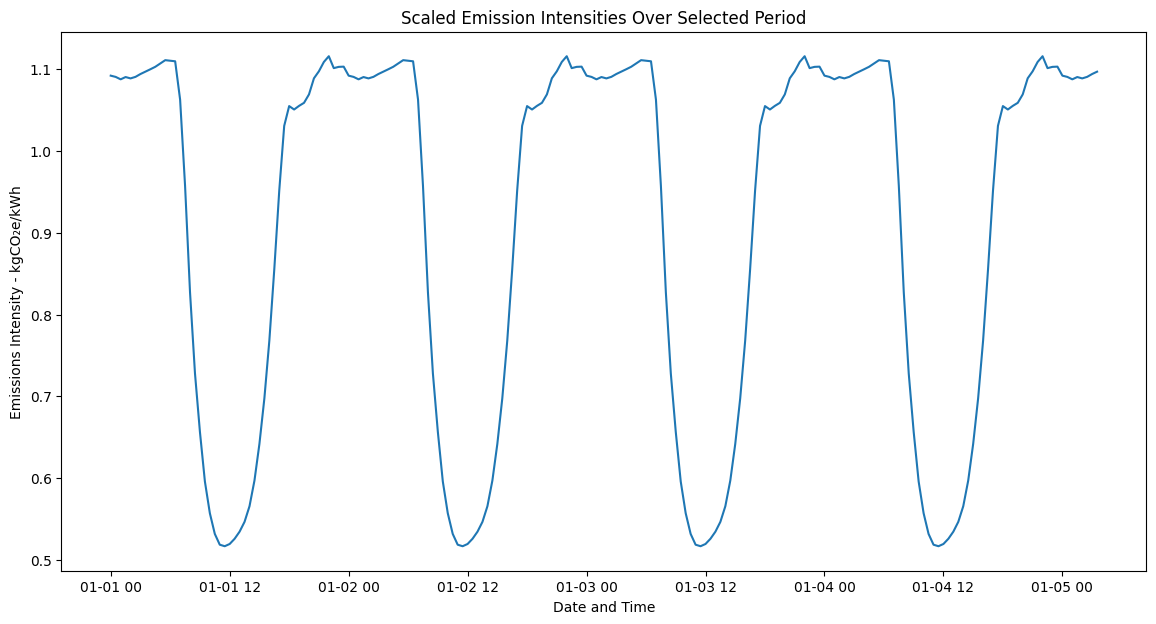

In [5]:
# 1. Load and prepare the yearly data
yearly_data = pd.read_csv('../../0raw_data/19981201_New_South_Wales_yearly.csv', parse_dates=['date'])
yearly_data['date'] = pd.to_datetime(yearly_data['date'])
yearly_data_filtered = yearly_data[(yearly_data['date'] >= '2010-07-01') & (yearly_data['date'] <= '2013-06-30')]
monthly_averages = yearly_data_filtered.groupby(yearly_data_filtered['date'].dt.to_period('M'))['Emissions Intensity - kgCO₂e/MWh'].mean()

# 2. Load and prepare the weekly data
weekly_data = pd.read_csv('../../0raw_data/20240405_New_South_Wales_weekly.csv', parse_dates=['date'])
weekly_data['time'] = weekly_data['date'].dt.time
daily_profile_average = weekly_data.groupby('time')['Emissions Intensity - kgCO₂e/MWh'].mean()

# 3. Normalize the daily profile by setting its average to 1
normalized_daily_profile = daily_profile_average / daily_profile_average.mean()

# 4. Creating a template DataFrame with all half-hour slots for every day in the range
date_range = pd.date_range('2010-07-01 00:00:00', '2013-06-30 23:30:00', freq='30T')
scaled_emissions = pd.DataFrame(index=date_range, columns=['emissions'])

# 5. Scale the normalized profile by the monthly average for each corresponding month
for single_date in scaled_emissions.index:
    month_period = single_date.to_period('M')
    if month_period in monthly_averages.index:
        month_intensity = monthly_averages[month_period]
        scaled_emissions.at[single_date, 'emissions'] = normalized_daily_profile[single_date.time()] * month_intensity

scaled_emissions['emissions'] /= 1000 # MWh to kWh

# 6. Plotting
start_date = pd.Timestamp('2011-01-01')
end_date = pd.Timestamp('2011-02-10')

# Filter the scaled emissions DataFrame to the specified date range
filtered_emissions = scaled_emissions[(scaled_emissions.index >= start_date) & (scaled_emissions.index <= end_date)]

# Plot the filtered result
plt.figure(figsize=(14, 7))
plt.plot(filtered_emissions.index[:200], filtered_emissions['emissions'][:200])
plt.title('Scaled Emission Intensities Over Selected Period')
plt.xlabel('Date and Time')
plt.ylabel('Emissions Intensity - kgCO₂e/kWh')
plt.show()

In [4]:
weekly_data

,date,Battery (Charging) - MW,Pumps - MW,Exports - MW,Imports - MW,Coal (Black) - MW,Bioenergy (Biogas) - MW,Distillate - MW,Gas (CCGT) - MW,Gas (OCGT) - MW,...,Exports Emissions Vol - tCO₂e,Imports Emissions Vol - tCO₂e,Coal (Black) Emissions Vol - tCO₂e,Bioenergy (Biogas) Emissions Vol - tCO₂e,Distillate Emissions Vol - tCO₂e,Gas (CCGT) Emissions Vol - tCO₂e,Gas (OCGT) Emissions Vol - tCO₂e,Emissions Intensity - kgCO₂e/MWh,Price - AUD/MWh,time
0,2024-04-05 00:00:00,-1.69,0.00,-385.60,667.10,4996.67,32.04,0.0,0.21,27.42,...,63.46,146.96,1137.7,0.14,0.0,0.03,5.36,678.98,56.99,00:00:00
1,2024-04-05 00:30:00,-1.24,-36.89,-393.77,667.43,4863.33,32.00,0.0,0.21,27.42,...,128.26,292.23,2215.0,0.29,0.0,0.06,10.73,679.60,56.99,00:30:00
2,2024-04-05 01:00:00,-5.07,-43.60,-417.00,671.12,4703.67,33.29,0.0,0.21,27.42,...,134.20,294.30,2142.1,0.30,0.0,0.06,10.73,674.95,56.77,01:00:00
3,2024-04-05 01:30:00,-2.26,-43.55,-318.95,694.72,4360.83,35.11,0.0,0.21,27.42,...,100.32,299.60,1985.8,0.32,0.0,0.06,10.73,662.24,55.45,01:30:00
4,2024-04-05 02:00:00,-3.61,-43.54,-304.33,669.47,4309.00,36.34,0.0,0.22,27.42,...,96.14,285.10,1962.4,0.33,0.0,0.06,10.73,663.06,56.99,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2024-04-12 20:00:00,-0.86,0.00,0.00,475.63,6668.83,41.74,0.0,0.20,415.12,...,0.00,200.36,3035.9,0.38,0.0,0.06,151.09,831.26,89.00,20:00:00
377,2024-04-12 20:30:00,-31.71,0.00,0.00,600.28,6792.50,42.17,0.0,0.19,180.57,...,0.00,250.83,3092.0,0.38,0.0,0.06,66.15,846.81,137.70,20:30:00
378,2024-04-12 21:00:00,-24.80,0.00,0.00,692.23,6693.00,41.98,0.0,0.19,34.08,...,0.00,287.87,3046.9,0.38,0.0,0.06,13.09,843.14,120.20,21:00:00
379,2024-04-12 21:30:00,-7.72,0.00,0.00,626.40,6611.00,41.65,0.0,0.20,25.87,...,0.00,263.10,3009.7,0.37,0.0,0.06,10.12,844.68,141.10,21:30:00


In [5]:
#scaled_emissions.to_csv('../../3final_data/Emission_Intensity_dataset.csv', index=True)